In [ ]:
import sys
import os
import pandas as pd

from sklearn.model_selection import train_test_split

# Add the 'src' directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "src")))

# import modules from 'src'
from decision_tree import train_decision_tree
from tree_conversion import tree_to_select, tree_to_where
from tree_visualization import visualize_tree

In [2]:
def load_titanic():
    """Load Titanic dataset (preprocessed)."""
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    df = pd.read_csv(url)

    # Select useful features & preprocess
    df = df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Survived"]].dropna()
    df["Sex"] = df["Sex"].map({"male": 0, "female": 1})  # Convert categorical to numeric

    X = df.drop("Survived", axis=1)
    y = df["Survived"]

    return X, y

X_titanic, y_titanic = load_titanic()
feature_names_titanic = list(X_titanic.columns)

X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=42)

In [3]:
def load_diabetes():
    """Load Diabetes dataset."""
    url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
    cols = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", 
            "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

    df = pd.read_csv(url, names=cols)

    X = df.drop("Outcome", axis=1)
    y = df["Outcome"]

    return X, y

X_diabetes, y_diabetes = load_diabetes()
feature_names_diabetes = list(X_diabetes.columns)

X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=42)

In [20]:
# Train models
clf_titanic = train_decision_tree(X_train_titanic, y_train_titanic)
clf_diabetes = train_decision_tree(X_train_diabetes, y_train_diabetes)

# Evaluate performance
print("Train Accuracy (Titanic):", clf_titanic.score(X_train_titanic, y_train_titanic))
print("Train Accuracy (Diabetes):", clf_diabetes.score(X_train_diabetes, y_train_diabetes))

Train Accuracy (Titanic): 0.8318739054290718
Train Accuracy (Diabetes): 0.7768729641693811


In [21]:
rules_titanic = tree_to_where(clf_titanic, feature_names_titanic)
rules_diabetes = tree_to_where(clf_diabetes, feature_names_diabetes)

,Condition,Prediction
0,Sex ≤ 0.50 & Age ≤ 3.50 & SibSp ≤ 3.00,1
1,Sex ≤ 0.50 & Age ≤ 3.50 & SibSp > 3.00,0
2,Sex ≤ 0.50 & Age > 3.50 & Pclass ≤ 1.50,0
3,Sex ≤ 0.50 & Age > 3.50 & Pclass > 1.50,0
4,Sex > 0.50 & Pclass ≤ 2.50 & Age ≤ 2.50,0
5,Sex > 0.50 & Pclass ≤ 2.50 & Age > 2.50,1
6,Sex > 0.50 & Pclass > 2.50 & Age ≤ 27.50,1
7,Sex > 0.50 & Pclass > 2.50 & Age > 27.50,0


,Condition,Prediction
0,Glucose ≤ 127.50 & Age ≤ 28.50 & BMI ≤ 30.95,0
1,Glucose ≤ 127.50 & Age ≤ 28.50 & BMI > 30.95,0
2,Glucose ≤ 127.50 & Age > 28.50 & BMI ≤ 26.35,0
3,Glucose ≤ 127.50 & Age > 28.50 & BMI > 26.35,0
4,Glucose > 127.50 & BMI ≤ 29.95 & Glucose ≤ 146.50,0
5,Glucose > 127.50 & BMI ≤ 29.95 & Glucose > 146.50,1
6,Glucose > 127.50 & BMI > 29.95 & Glucose ≤ 165.50,1
7,Glucose > 127.50 & BMI > 29.95 & Glucose > 165.50,1


In [22]:
# Test tree_to_select
rules_select = tree_to_select(clf_titanic, feature_names_titanic)
print(rules_select)

np.select([
    [(Sex <= np.float64(0.5)) & (Age <= np.float64(3.5)) & (SibSp <= np.float64(3.0))],
    [(Sex <= np.float64(0.5)) & (Age <= np.float64(3.5)) & (SibSp > np.float64(3.0))],
    [(Sex <= np.float64(0.5)) & (Age > np.float64(3.5)) & (Pclass <= np.float64(1.5))],
    [(Sex <= np.float64(0.5)) & (Age > np.float64(3.5)) & (Pclass > np.float64(1.5))],
    [(Sex > np.float64(0.5)) & (Pclass <= np.float64(2.5)) & (Age <= np.float64(2.5))],
    [(Sex > np.float64(0.5)) & (Pclass <= np.float64(2.5)) & (Age > np.float64(2.5))],
    [(Sex > np.float64(0.5)) & (Pclass > np.float64(2.5)) & (Age <= np.float64(27.5))],
    [(Sex > np.float64(0.5)) & (Pclass > np.float64(2.5)) & (Age > np.float64(27.5))]
], [
    1,
    0,
    0,
    0,
    0,
    1,
    1,
    0
], default=-1)


Tree visualization saved to titanic_tree.jpeg


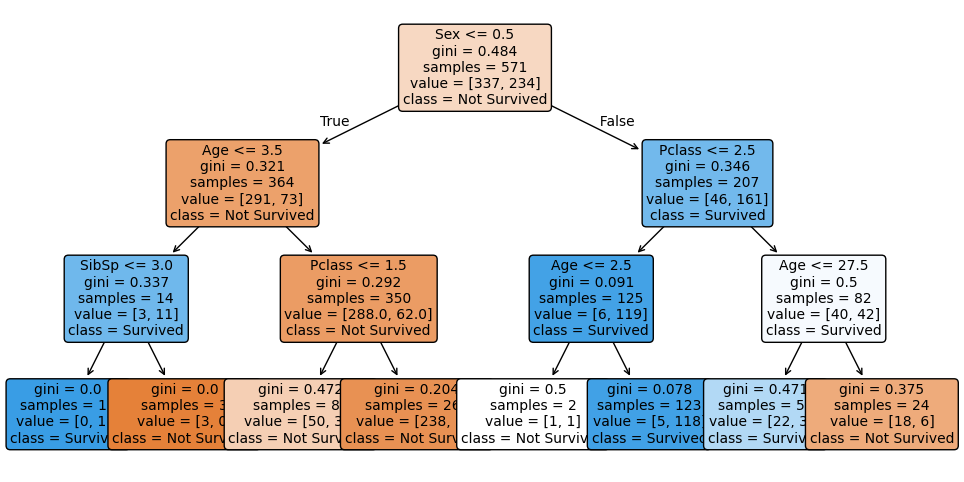

In [23]:
# Visualize the Decision Tree
visualize_tree(clf_titanic, feature_names_titanic, class_names=["Not Survived", "Survived"], save_path='titanic_tree.jpeg')

Tree visualization saved to diabetes_tree.jpeg


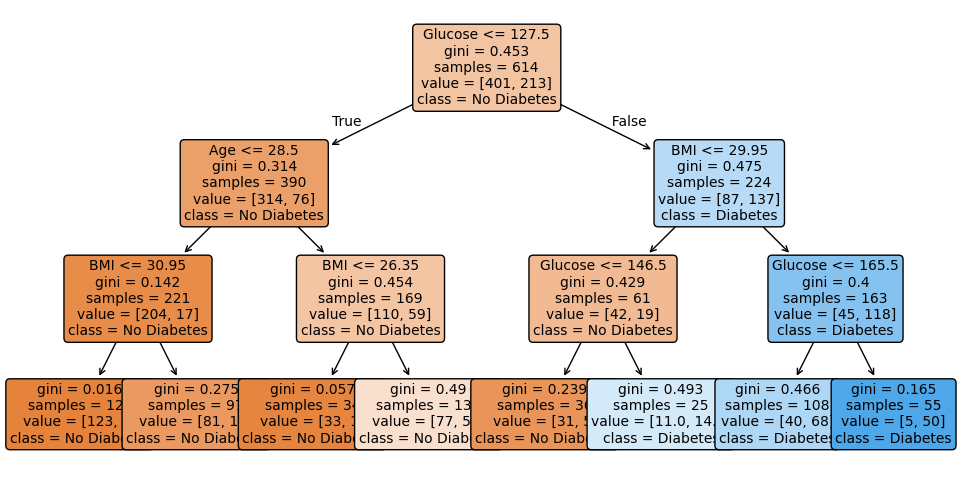

In [24]:
# Visualize the Diabetes Decision Tree
visualize_tree(clf_diabetes, feature_names_diabetes, class_names=["No Diabetes", "Diabetes"], save_path='diabetes_tree.jpeg')